## Import packages

In [82]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import pickle
%matplotlib inline

## Read data

Read the file **header.pkl** with pandas as DataFrame and the file **seismic_data_source_1000.nc** with xarray as DataSet

In [83]:
filenames=["inter_topo.pkl","header_new.pkl","seismic_data_source_1000.nc"]
for filename in filenames:
    if os.path.isfile(filename):
        print(filename+" exists.")
    else: 
        url = 'https://filedn.com/lEzjnrJwSG47nSDwzIitUuf'
        folder='/Data/swi_python/'
        command = ['wget', url+folder+filename]
        subprocess.run(command)

with open(filenames[0], 'rb') as f:
     rbf = pickle.load(f)
header = pd.read_pickle(filenames[1])
seismic_data= xr.open_dataset(filenames[2])
seismic_data

header_new.pkl exists.
seismic_data_source_1000.nc exists.


<xarray.Dataset>
Dimensions:  (twt: 4001, time: 4001, cdp: 1180)
Coordinates:
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp      (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
Data variables:
    data     (cdp, time) float32 ...
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

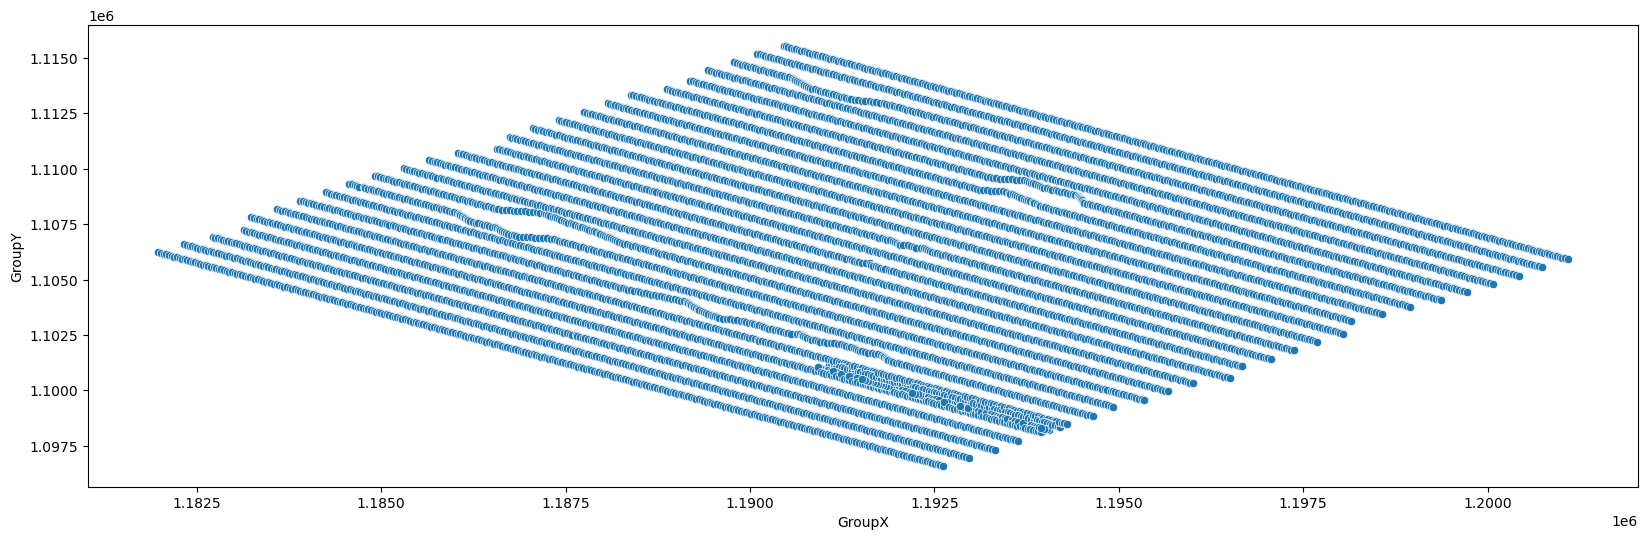

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981934,8666679,2981935,3628,1916,2933,210725,0,12,0,1,...,0,0,0,0,0,0,147364.797755,1.626009e+06,144561.355938,1.625250e+06
2981935,8666680,2981936,3628,1917,2933,210726,0,12,0,1,...,0,0,0,0,0,0,147412.961969,1.626009e+06,144561.355938,1.625250e+06
2981936,8666681,2981937,3628,1918,2933,210727,0,12,0,1,...,0,0,0,0,0,0,147460.385105,1.626009e+06,144561.355938,1.625250e+06
2983819,8670862,2983820,3530,2084,2935,206392,0,12,0,1,...,0,0,0,0,0,0,147509.220738,1.626009e+06,144792.985494,1.624750e+06


In [84]:
rec_pos=header.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos, x="GroupX", y="GroupY")
plt.show()
rec_pos

## Create new dimensions
Compute **Azimuth** and **Offset** from sources and receivers positions.

In [85]:
pos_x=np.array(header['SourceX']-header['GroupX'], dtype='f')
pos_y=np.array(header['SourceY']-header['GroupY'], dtype='f')
azimuth=np.arctan2(-pos_x, pos_y) * 180 / np.pi+180
#offset = np.linalg.norm([pos_x,pos_y], axis=0)*np.sign(-pos_x)  
offset = -pos_x
header['Azimuth']=azimuth
header['Offset']=offset
source=1000
header=header[header['EnergySourcePoint']==source] # Analizar disparo source
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset
871637,2370881,871638,3225,290,1000,137174,0,12,0,1,...,0,0,0,0,136136.843809,1.619959e+06,137020.002344,1.622822e+06,120.681747,-2577.0
871638,2370882,871639,3225,291,1000,137175,0,12,0,1,...,0,0,0,0,136184.336604,1.619960e+06,137020.002344,1.622822e+06,121.547081,-2541.0
871639,2370883,871640,3225,292,1000,137176,0,12,0,1,...,0,0,0,0,136232.500818,1.619960e+06,137020.002344,1.622822e+06,122.437134,-2505.0
871640,2370884,871641,3225,293,1000,137177,0,12,0,1,...,0,0,0,0,136280.665033,1.619961e+06,137020.002344,1.622822e+06,123.335167,-2469.0
871641,2370885,871642,3225,294,1000,137178,0,12,0,1,...,0,0,0,0,136328.829247,1.619961e+06,137020.002344,1.622822e+06,124.240814,-2433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,2373481,872813,3225,2890,1000,184955,0,12,0,1,...,0,0,0,0,138135.597686,1.625503e+06,137020.002344,1.622822e+06,295.232635,2627.0
872813,2373482,872814,3225,2891,1000,184956,0,12,0,1,...,0,0,0,0,138183.761900,1.625504e+06,137020.002344,1.622822e+06,294.364471,2663.0
872814,2373483,872815,3225,2892,1000,184957,0,12,0,1,...,0,0,0,0,138231.856455,1.625503e+06,137020.002344,1.622822e+06,293.497772,2698.0
872815,2373484,872816,3225,2893,1000,184958,0,12,0,1,...,0,0,0,0,138280.020669,1.625503e+06,137020.002344,1.622822e+06,292.652588,2734.0


Compute **Geodesic**

In [86]:
x_pts=header[['SourceX_new','ReceiverX']].to_numpy().astype('f')
y_pts=header[['SourceY_new','ReceiverY']].to_numpy().astype('f')
xt = np.transpose(np.linspace(x_pts[:,0],x_pts[:,1],20))
yt = np.transpose(np.linspace(y_pts[:,0],y_pts[:,1],20))
np.shape(xt)

(1180, 20)

In [87]:
zt = rbf(xt,yt)
#zt = np.zeros(np.shape(xt))
#for i in range(np.size(xt,axis=0)):
#    zt[i,:] = rbf(xt[i,:], yt[i,:])
np.shape(zt)
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0), axis=1)
header['Geodesic']=geodesic
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset,Geodesic
871637,2370881,871638,3225,290,1000,137174,0,12,0,1,...,0,0,0,136136.843809,1.619959e+06,137020.002344,1.622822e+06,120.681747,-2577.0,3115.732396
871638,2370882,871639,3225,291,1000,137175,0,12,0,1,...,0,0,0,136184.336604,1.619960e+06,137020.002344,1.622822e+06,121.547081,-2541.0,3088.397858
871639,2370883,871640,3225,292,1000,137176,0,12,0,1,...,0,0,0,136232.500818,1.619960e+06,137020.002344,1.622822e+06,122.437134,-2505.0,3065.795262
871640,2370884,871641,3225,293,1000,137177,0,12,0,1,...,0,0,0,136280.665033,1.619961e+06,137020.002344,1.622822e+06,123.335167,-2469.0,3052.985371
871641,2370885,871642,3225,294,1000,137178,0,12,0,1,...,0,0,0,136328.829247,1.619961e+06,137020.002344,1.622822e+06,124.240814,-2433.0,3039.486599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,2373481,872813,3225,2890,1000,184955,0,12,0,1,...,0,0,0,138135.597686,1.625503e+06,137020.002344,1.622822e+06,295.232635,2627.0,2938.840724
872813,2373482,872814,3225,2891,1000,184956,0,12,0,1,...,0,0,0,138183.761900,1.625504e+06,137020.002344,1.622822e+06,294.364471,2663.0,2958.418758
872814,2373483,872815,3225,2892,1000,184957,0,12,0,1,...,0,0,0,138231.856455,1.625503e+06,137020.002344,1.622822e+06,293.497772,2698.0,2978.213948
872815,2373484,872816,3225,2893,1000,184958,0,12,0,1,...,0,0,0,138280.020669,1.625503e+06,137020.002344,1.622822e+06,292.652588,2734.0,3000.117029


## Highligth position by inline
Show receivers from the source 1000 with inline 257.

In [88]:
shot_pos=header[header['EnergySourcePoint']==source]
shot_pos[['INLINE_3D']].drop_duplicates()

,INLINE_3D
871637,222
871675,229
871752,236
871850,243
871962,250
872082,257
872206,264
872323,265
872325,266
872331,271


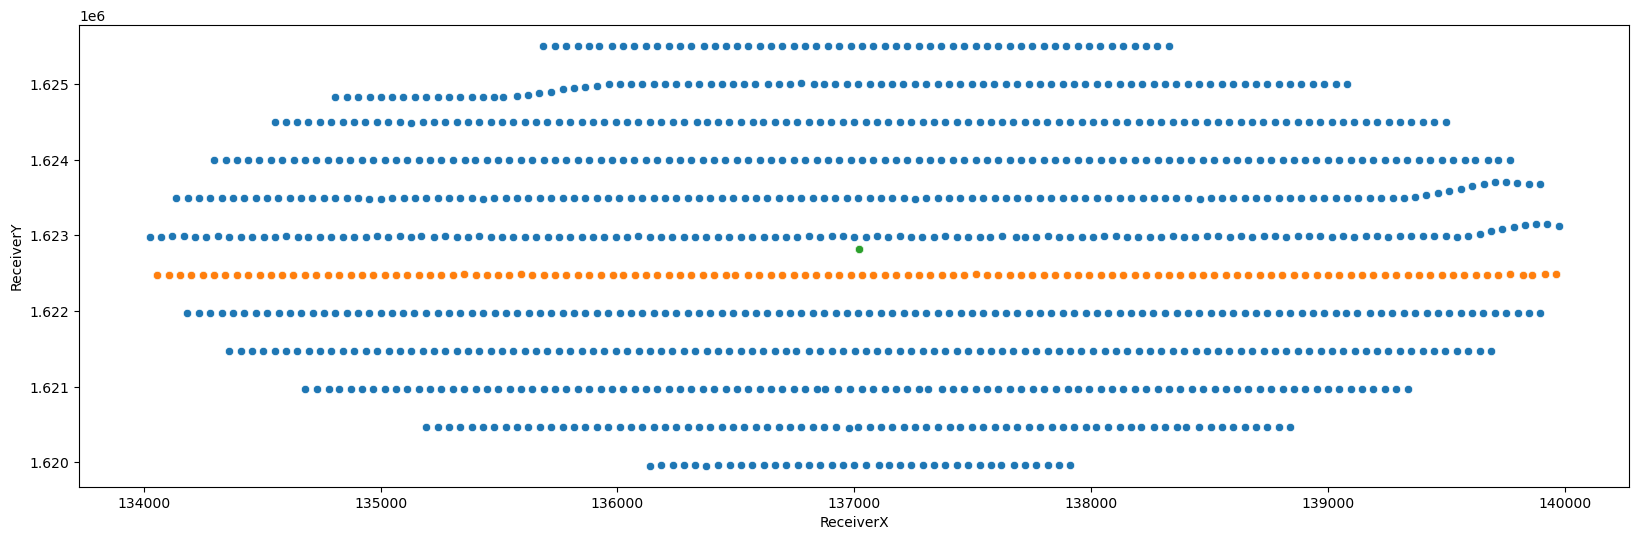

In [89]:
inline = 257
rec_inline_pos=shot_pos[(shot_pos['INLINE_3D']==inline)]
sns.scatterplot(data=header, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=rec_inline_pos, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=rec_inline_pos, x="SourceX_new", y="SourceY_new")
plt.show()

## Selecting traces for the azimuth bin
Create the azimuth coordinate for the DataSet **seismic_data**

In [90]:
seismic_data["inline"] = ("inline",  shot_pos['INLINE_3D'])
seismic_data["azimuth"] = ("inline",  shot_pos['Azimuth'])
seismic_data["offset"] = ("inline",  shot_pos['Offset'])
seismic_data["geodesic"] = ("inline",  shot_pos['Geodesic'])
seismic_data["data"] = (("inline", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:   (twt: 4001, time: 4001, inline: 1180, cdp: 1180)
Coordinates:
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
  * inline    (inline) int16 222 222 222 222 222 222 ... 299 299 299 299 299 299
Data variables:
    data      (inline, time) float32 26.84 25.84 23.84 ... 9.652 10.65 6.652
    azimuth   (inline) float32 120.7 121.5 122.4 123.3 ... 293.5 292.7 291.8
    offset    (inline) float32 -2.577e+03 -2.541e+03 ... 2.734e+03 2.77e+03
    geodesic  (inline) float64 3.116e+03 3.088e+03 3.066e+03 ... 3e+03 3.022e+03
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

Select DataArray **data_azimuth** from the DataSet **seimisc_data** in the azimuth bin.

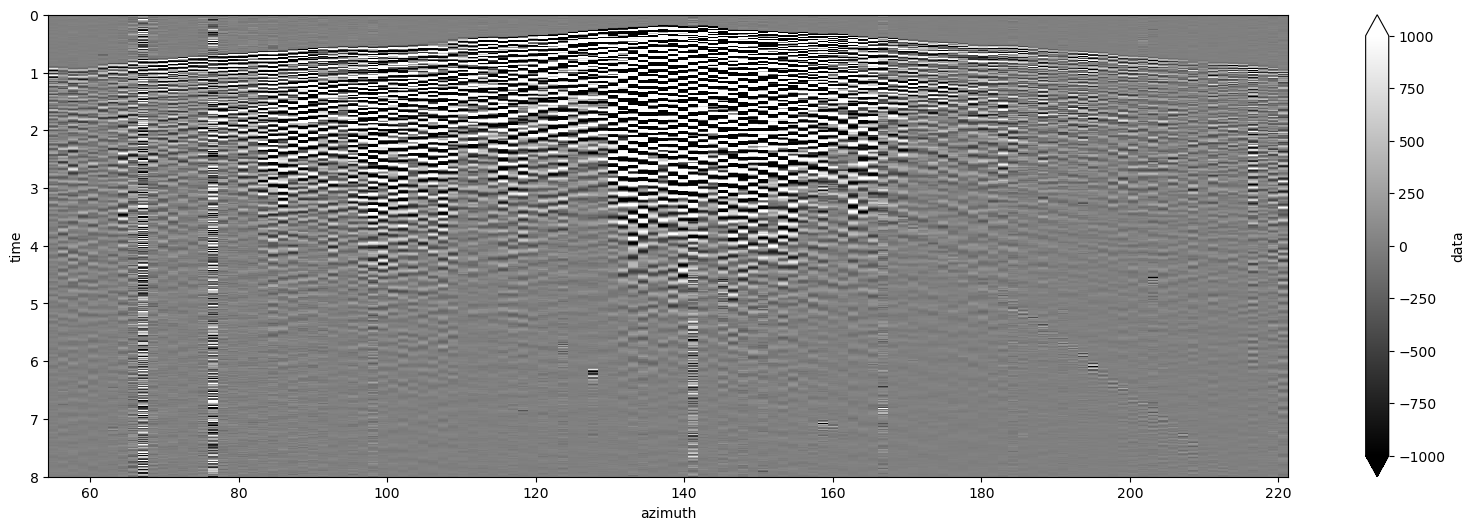

In [91]:
data = seismic_data.where((seismic_data.inline==inline), drop=True)  #Select traces for the azimuth bin
data=data.swap_dims({"inline": "azimuth"})
data_azimuth = data.data.sortby('azimuth') #Sort DataArray by azimuth
data_azimuth.plot.imshow('azimuth','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

Plot the shot gather foe the azimuth bin sort by azimuth.

## Sort the data by offset and geodesic
Select DataArray **data_offset** from the DataSet **data** in the azimuth bin.
Select DataArray **data_geodesic** from the DataSet **data** in the azimuth bin.

In [92]:
data=data.swap_dims({"azimuth": "offset"})
data

<xarray.Dataset>
Dimensions:   (offset: 124, time: 4001, twt: 4001, cdp: 1180)
Coordinates:
    azimuth   (offset) float32 54.4 54.51 54.61 54.75 ... 221.0 221.2 221.3
  * offset    (offset) float32 -2.425e+03 -2.39e+03 ... 1.919e+03 1.954e+03
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
    inline    (offset) int16 257 257 257 257 257 257 ... 257 257 257 257 257 257
Data variables:
    data      (offset, time) float32 15.78 19.78 17.78 ... -43.24 -37.24 -38.24
    geodesic  (offset) float64 3.26e+03 3.193e+03 ... 2.993e+03 3.056e+03
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

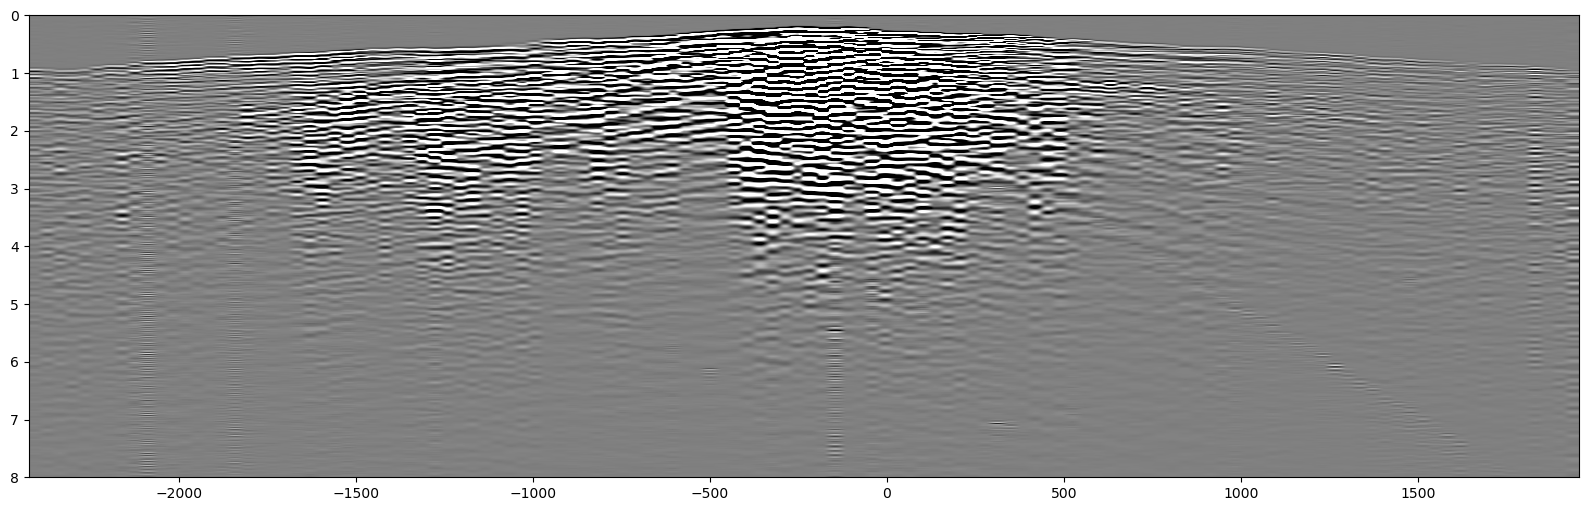

In [93]:
#data=data.swap_dims({"azimuth": "offset"})
xx, tt = np.meshgrid(data.offset, data.time)
M = np.abs(xx)/(tt+2e-2)
M = (M>200)*(M<1200)
xmin, xmax= data.offset[0], data.offset[-1]
tmin, tmax = data.time[0], data.time[-1]
plt.imshow(M,cmap='gray',origin='upper',extent=(xmin, xmax, tmax, tmin),aspect='auto')
#data['data'] = data.data*M.T
plt.imshow(data.data.T,cmap='gray',origin='upper',extent=(xmin, xmax, tmax, tmin),aspect='auto',vmin=-1000,vmax=1000)
data_offset = data.data.sortby('offset') #Sort DataArray by offset


In [94]:
data=data.swap_dims({"offset": "geodesic"})
data_geodesic = data.data.sortby('geodesic') #Sort DataArray by offset

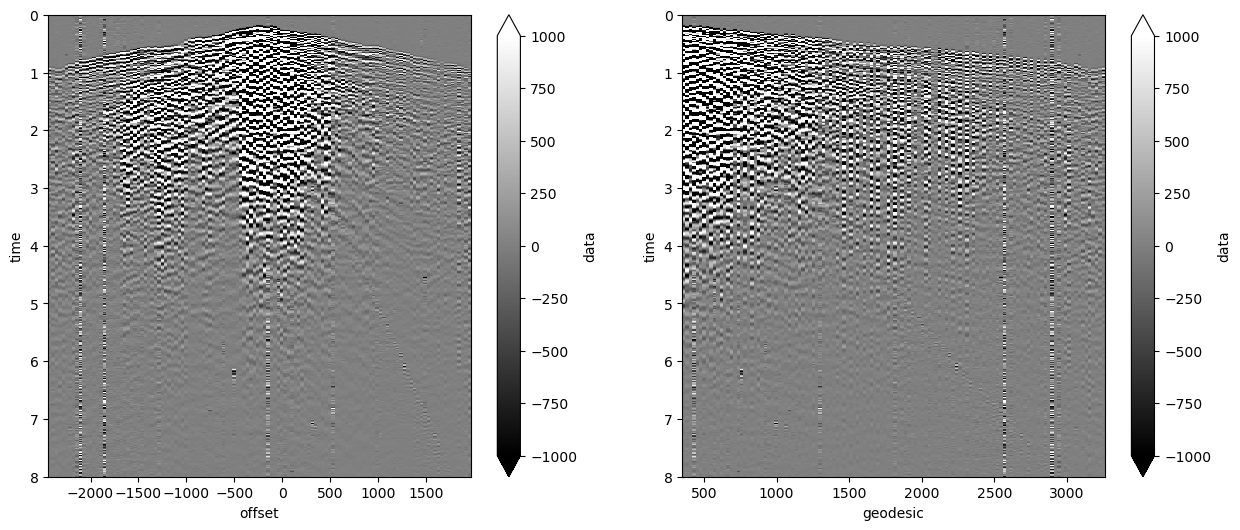

In [95]:
plt.rcParams['figure.figsize'] = [15, 6]
fig, axs = plt.subplots(1,2)
data_offset.plot.imshow('offset','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper', ax=axs[0])
data_geodesic.plot.imshow('geodesic','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper', ax=axs[1])

In [96]:
data_offset

<xarray.DataArray 'data' (offset: 124, time: 4001)>
array([[ 15.781153  ,  19.781082  ,  17.78151   , ..., -14.218794  ,
        -15.218854  , -18.21875   ],
       [-23.44107   ,  -8.441786  ,  -1.4412613 , ...,  -5.441267  ,
          7.558811  ,  -0.44140625],
       [  0.10892344,   8.109842  ,  -0.8911915 , ..., -19.891144  ,
        -20.891129  , -49.890625  ],
       ...,
       [ -4.898429  ,  -3.898281  ,  -2.8981342 , ...,   8.101809  ,
         -0.8985801 ,  -4.8984375 ],
       [ 17.57016   ,  -0.42944574,   0.5699434 , ..., -12.429411  ,
        -25.42952   , -36.429688  ],
       [ 12.7579    , -18.242249  , -24.242462  , ..., -43.241882  ,
        -37.241577  , -38.242188  ]], dtype=float32)
Coordinates:
    azimuth  (offset) float32 54.4 54.51 54.61 54.75 ... 220.8 221.0 221.2 221.3
  * offset   (offset) float32 -2.425e+03 -2.39e+03 ... 1.919e+03 1.954e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    inline   (offset) int16 257 257 257 257 257 257 ... 257 257 257 257 257 257

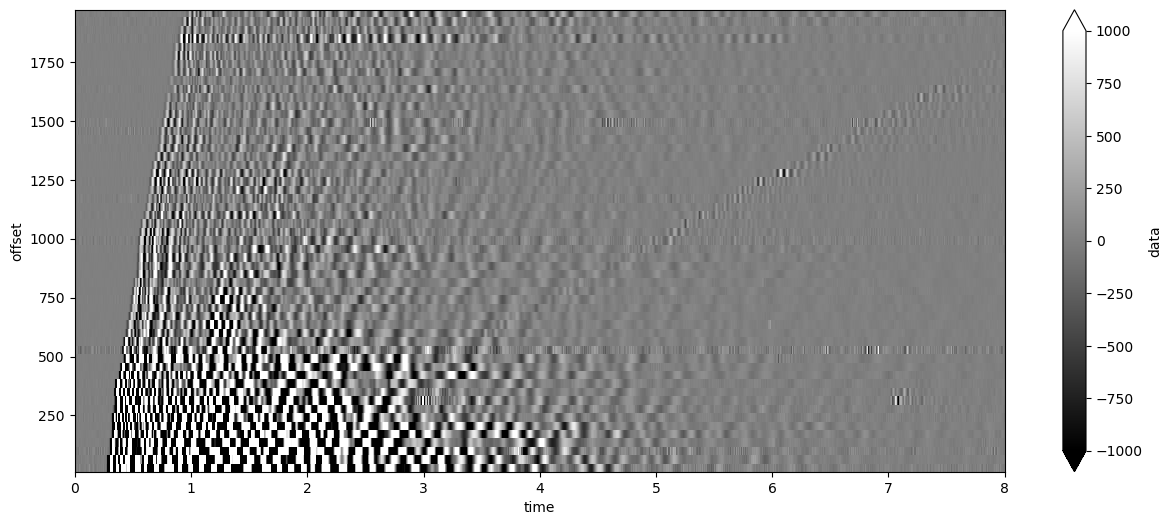

In [97]:
data_offsetp=data_offset.where((data_offset.offset>0), drop=True)
data_offsetn=data_offset.where((data_offset.offset<0), drop=True)
data_offsetn['offset']=np.abs(data_offsetn['offset'])
data_offsetp.plot.imshow(data_offsetp.dims[1],data_offsetp.dims[0],cmap='gray', vmin=-1000, vmax=1000)
#data_offsetn.plot.imshow(data_offsetn.dims[1],data_offsetn.dims[0],cmap='gray', vmin=-1000, vmax=1000)

In [98]:
data_geodesic

<xarray.DataArray 'data' (geodesic: 124, time: 4001)>
array([[ -8.483752  ,  -9.479053  , -12.464954  , ...,  29.52324   ,
         25.523346  ,  17.523438  ],
       [ -7.771246  ,  10.22849   ,  30.229126  , ..., -20.77208   ,
        -23.771057  , -26.771484  ],
       [  1.7221727 ,   1.7221727 ,  -4.2776546 , ...,   5.7186756 ,
          5.7186756 ,   4.71875   ],
       ...,
       [  0.10892344,   8.109842  ,  -0.8911915 , ..., -19.891144  ,
        -20.891129  , -49.890625  ],
       [-23.44107   ,  -8.441786  ,  -1.4412613 , ...,  -5.441267  ,
          7.558811  ,  -0.44140625],
       [ 15.781153  ,  19.781082  ,  17.78151   , ..., -14.218794  ,
        -15.218854  , -18.21875   ]], dtype=float32)
Coordinates:
    azimuth   (geodesic) float32 139.9 147.9 131.9 155.4 ... 54.61 54.51 54.4
    offset    (geodesic) float32 -220.0 -184.0 -255.0 ... -2.39e+03 -2.425e+03
  * geodesic  (geodesic) float64 351.8 354.1 358.1 ... 3.193e+03 3.26e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    inline    (geodesic) int16 257 257 257 257 257 257 ... 257 257 257 257 257

Plot the shot gather for the azimuth bin sort by offset.

Text(0, 0.5, 'Phase velocity (m/s)')

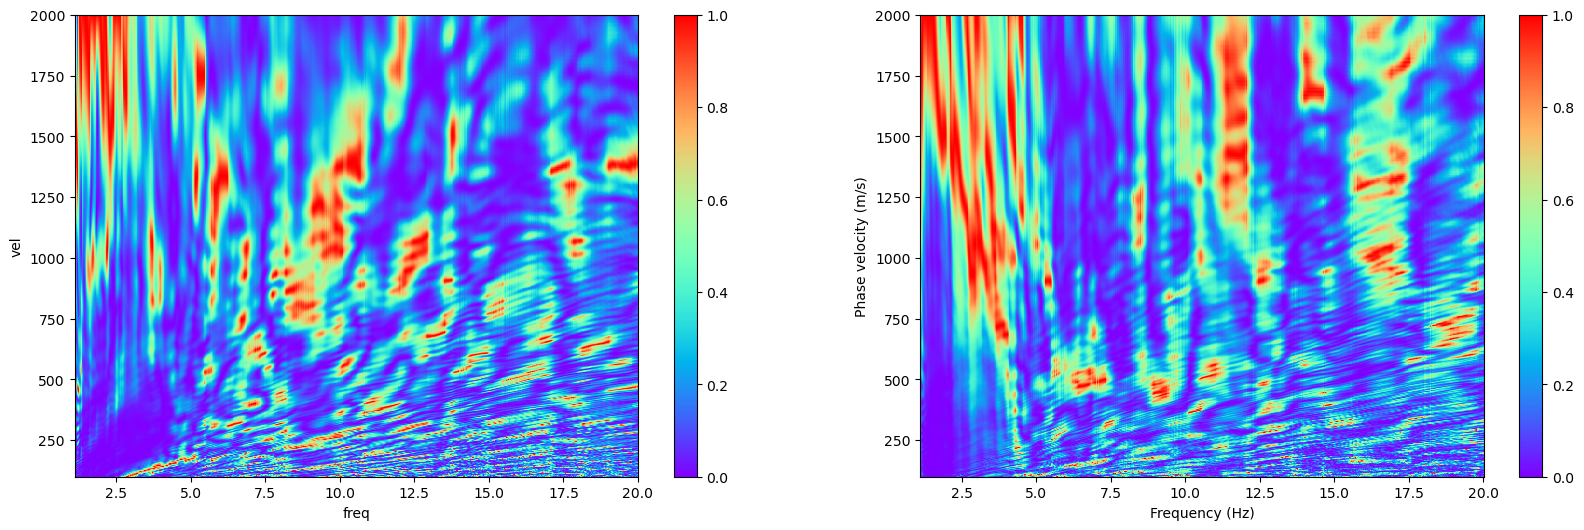

In [99]:
import masw_functions as mf
vmin=100.0 
vmax=2001.0
fmin=1.1 
fmax=20.0
pstep=5e-6
Nf=16001
v=np.arange(vmin,vmax)
D_offset=mf.DispersionSpectrum(data_offsetn,v,fmin,fmax,Nf,pstep)
D_geodesic=mf.DispersionSpectrum(data_geodesic,v,fmin,fmax,Nf,pstep)
#D_geodesic=D_offset-D_geodesic
plt.rcParams['figure.figsize'] = [20, 6]
fig, axs = plt.subplots(1,2)
D_offset.plot.imshow(D_offset.dims[1],D_offset.dims[0],cmap='rainbow', origin='lower', ax=axs[0])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")
D_geodesic.plot.imshow(D_geodesic.dims[1],D_geodesic.dims[0],cmap='rainbow', origin='lower', ax=axs[1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")